# **Project Name**  -   **AirBnb Bookings Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**    - Bholay Nath Singh


**BUSINESS PROBLEM OVERVIEW**

Airbnb is facing challenges in optimizing its booking system and maximizing revenue, as inefficiencies in various aspects of the booking process have become apparent. With data columns including host information, neighborhood details, room types, pricing, and review metrics, there is a need to analyze how these factors influence booking conversion rates and overall customer satisfaction. Specifically, issues such as fluctuating booking rates, inconsistent pricing strategies, and varying levels of host engagement have been identified as areas requiring detailed investigation.

The dataset, which includes attributes like price, availability_365, number_of_reviews, and reviews_per_month, is crucial for understanding how different elements impact booking performance. By examining these columns, Airbnb aims to identify patterns and correlations that could inform improvements in dynamic pricing, enhance the booking experience, and provide better support to hosts. The ultimate goal is to refine the booking system to boost conversion rates, increase revenue, and ensure a more satisfying experience for both guests and hosts.

# **GitHub Link -**

https://github.com/BholaySingh23/AirBnb-Bookings-Analysis.git

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### Loading Dataset

In [2]:
df = pd.read_csv('/content/Airbnb NYC 2019.csv',encoding='latin1')

### Dataset First View

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
df.shape

(48895, 16)

### Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Duplicate Values

In [6]:
len(df[df.duplicated()])

0

### Missing/Null Values

In [7]:
print(df.isna().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

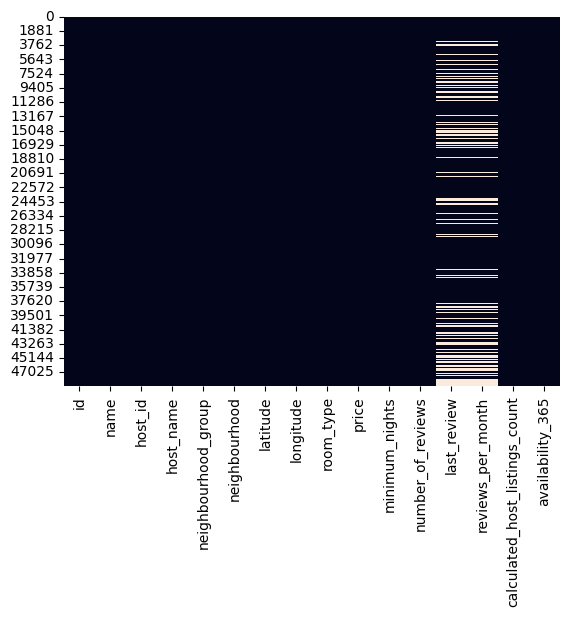

In [8]:
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The "Airbnb NYC 2019.csv" dataset, encompassing 48,895 rows and 16 columns, provides valuable insights for the short-term rental industry. This dataset is pivotal for analyzing various aspects of the rental market, including host performance, pricing strategies, and guest experiences. It includes essential data for understanding booking patterns and availability in New York City, making it a critical resource for stakeholders aiming to optimize rental strategies and enhance customer satisfaction. By addressing the missing values in review-related columns and utilizing the available data, industry professionals can better assess market trends, refine pricing models, and improve the overall quality of rental listings.

## ***2. Understanding Your Variables***

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Variables Description

* **id                :**Unique ID
* **name              :**Name of the Listing
* **host_id              :**Unique hosting id
* **host_name              :**Name of the Listing
* **neighbourhood_group              :**Location
* **neighbourhood              :**Area
* **latitude              :**Latitude Range
* **longitude              :**Longitude Range
* **room_type              :**Type of Listing
* **price              :**Price of Listing
* **minimum_nights              :**Minimum nights to be paid for
* **number_of_reviews              :**Number of reviews
* **last_review              :**Content of last review
* **reviews_per_month              :**Number of checks per month
* **calculated_host_listings_count              :**Total Count
* **availability_365              :**Availability around the year




### Check Unique Values for each variable.

In [11]:
dataset = df.copy()
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [14]:
df.shape

(48895, 16)

In [15]:
df.dropna(inplace=True)
df.shape

(38821, 16)

### What all manipulations have you done and insights you found?

As the variables having null values are very important so we cant directly impute values that would create a bias so to get correct insights drop thoes datapoints, still the dataframe had a lot of datapoints left so its a better idea to drop those rows.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Price Distribution Histogram

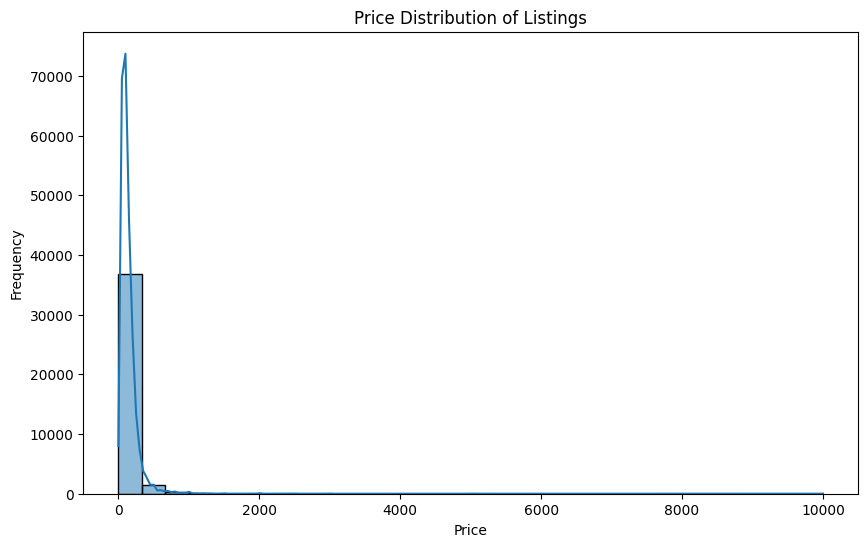

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution of Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize how prices are distributed.

##### 2. What is/are the insight(s) found from the chart?

Most listings may be concentrated in lower price ranges, indicating affordability for certain segments.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding price distribution helps in pricing strategy; if most listings are low-cost, higher-priced listings may struggle.

#### Chart - 2 : Room Type Count Bar Chart

<ipython-input-17-2ed55e07f8e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='viridis')


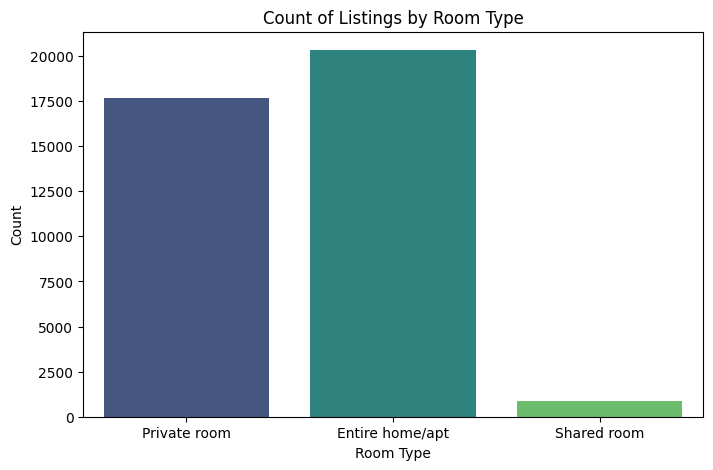

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', palette='viridis')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

To identify the popularity of different room types.

##### 2. What is/are the insight(s) found from the chart?

Certain room types (like "Entire home/apt") may dominate the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Insights on room type popularity can guide marketing and inventory decisions.

#### Chart - 3 : Price vs. Room Type Box Plot

<ipython-input-18-bd7efb532751>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette='Set2')


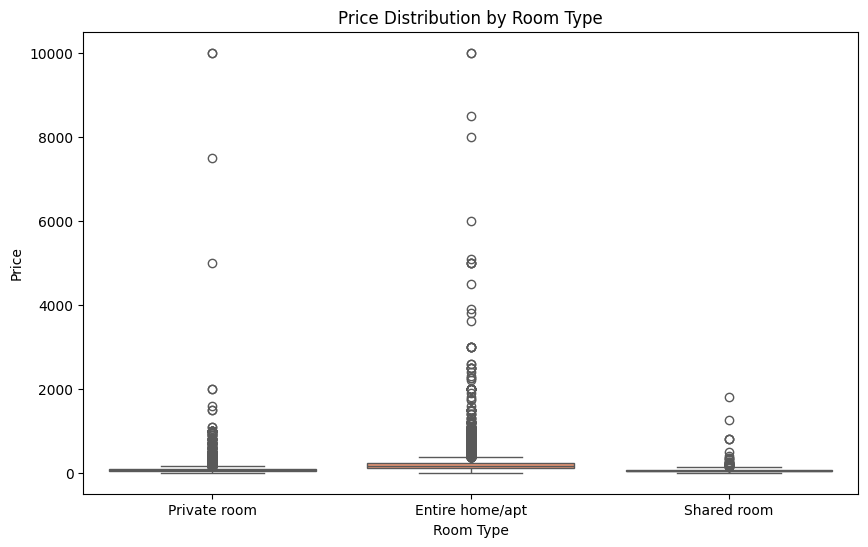

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price', palette='Set2')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze price variability across different room types.

##### 2. What is/are the insight(s) found from the chart?

There may be significant price variation within "Entire home/apt" compared to shared rooms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in adjusting pricing strategies according to room type.

#### Chart - 4 : Correlation Heatmap

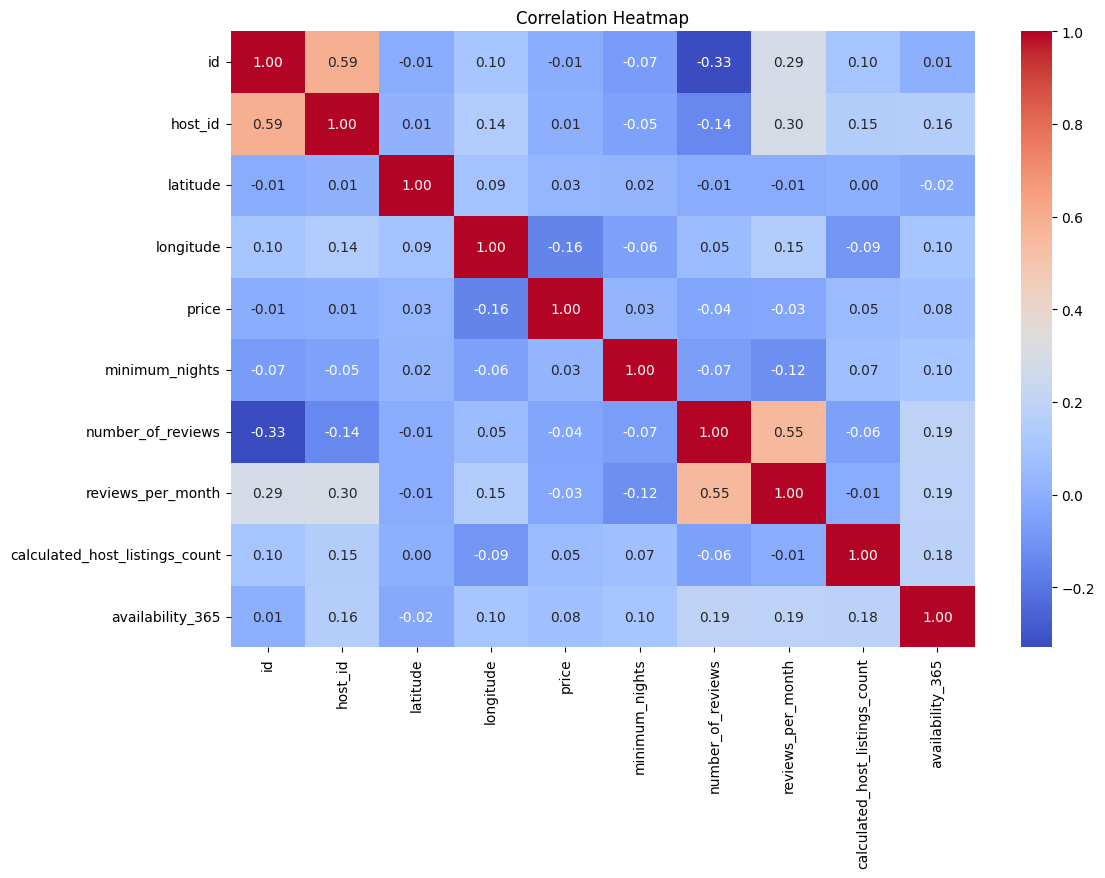

In [26]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

To identify relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

High correlation between price and number of reviews suggests popularity may drive pricing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focus on improving review scores could lead to higher prices and occupancy rates.

#### Chart - 5 : Minimum Nights vs. Price Scatter Plot

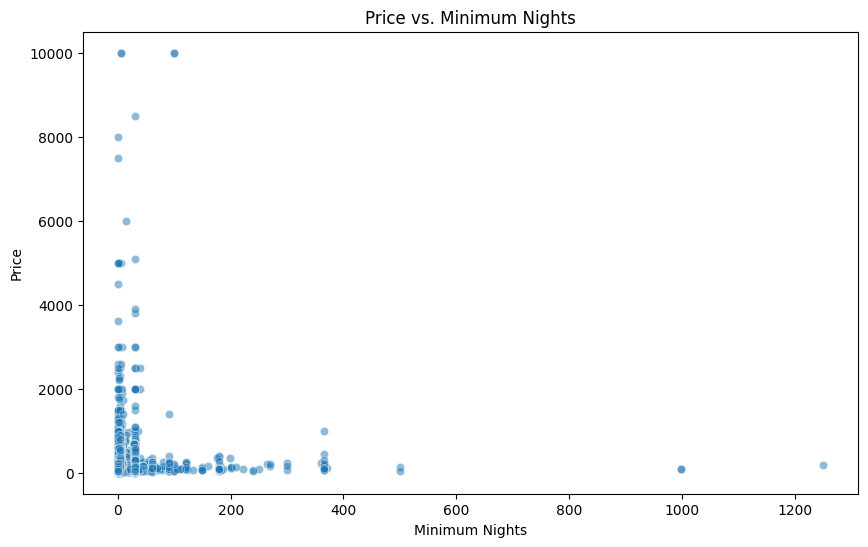

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.5)
plt.title('Price vs. Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

 To assess the relationship between minimum stay requirements and price.

##### 2. What is/are the insight(s) found from the chart?

 Listings with higher minimum nights may have varying prices, possibly indicating niche markets.

##### 3. Will the gained insights help creating a positive business impact?



Are there any insights that lead to negative growth? Justify with specific reason.

Adjusting minimum stay policies could enhance occupancy.

#### Chart - 6 : Availability vs. Price Scatter Plot

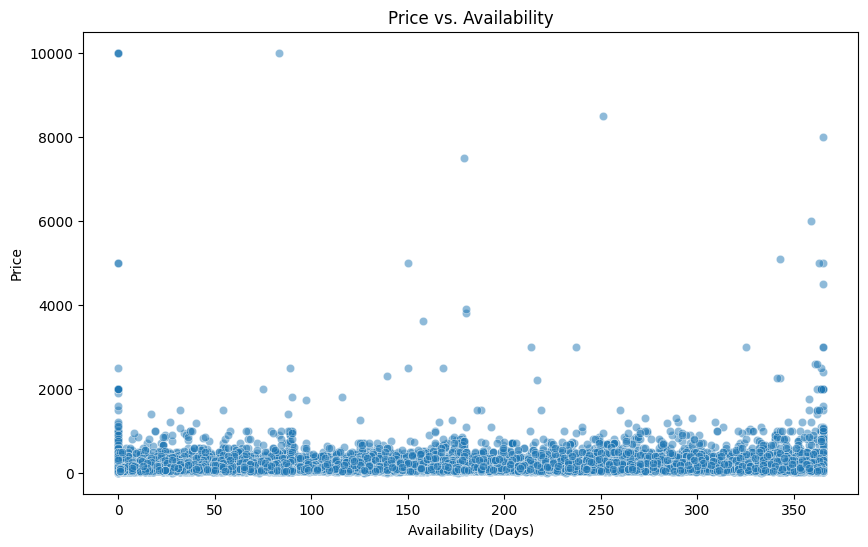

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5)
plt.title('Price vs. Availability')
plt.xlabel('Availability (Days)')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

To explore how listing availability impacts pricing.

##### 2. What is/are the insight(s) found from the chart?

 Less available listings might charge higher prices due to scarcity.

##### 3. Will the gained insights help creating a positive business impact?



Are there any insights that lead to negative growth? Justify with specific reason.

Encouraging hosts to increase availability could improve revenue without decreasing prices.


#### Chart - 7 : Reviews per Month vs. Price Scatter Plot

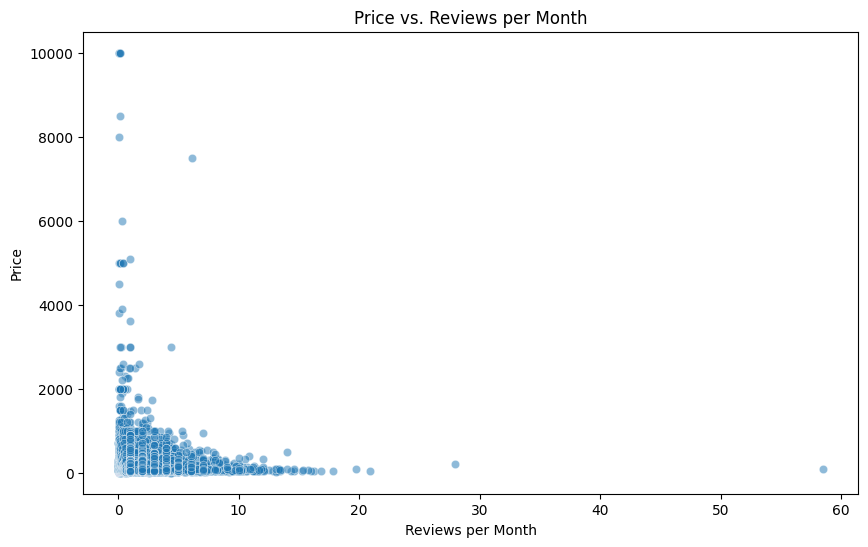

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reviews_per_month', y='price', alpha=0.5)
plt.title('Price vs. Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

To analyze the influence of reviews on pricing.



##### 2. What is/are the insight(s) found from the chart?

Higher reviews correlate with higher prices, indicating trusted listings are preferred.

##### 3. Will the gained insights help creating a positive business impact?



Are there any insights that lead to negative growth? Justify with specific reason.

 Enhancing review acquisition strategies can positively affect pricing and occupancy.

#### Chart - 8 : Neighbourhood Group Count Bar Chart

<ipython-input-23-922f04cc1aeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='pastel')


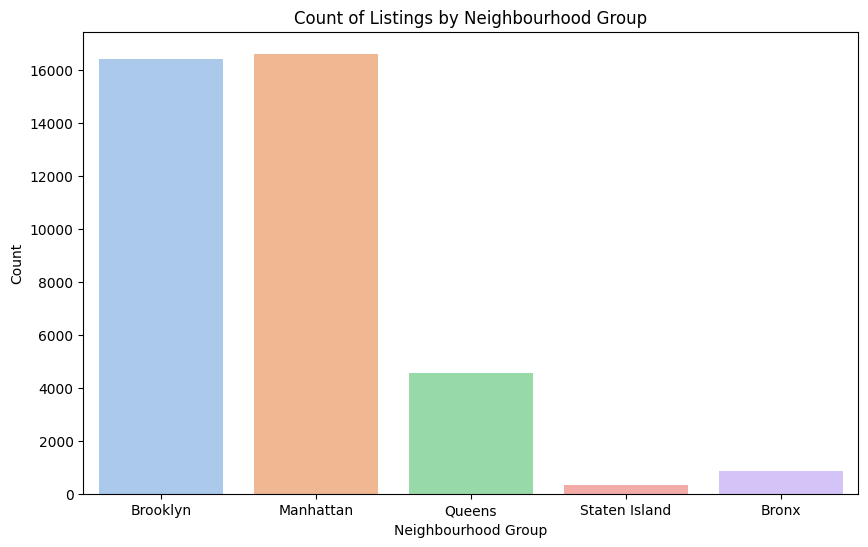

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', palette='pastel')
plt.title('Count of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

To visualize the distribution of listings across neighborhoods.


##### 2. What is/are the insight(s) found from the chart?

Certain neighbourhoods may have significantly more listings than others.

##### 3. Will the gained insights help creating a positive business impact?



Are there any insights that lead to negative growth? Justify with specific reason.

 Identifying popular neighbourhoods can inform targeted marketing efforts.

#### Chart - 9 : Number of Reviews Distribution Histogram

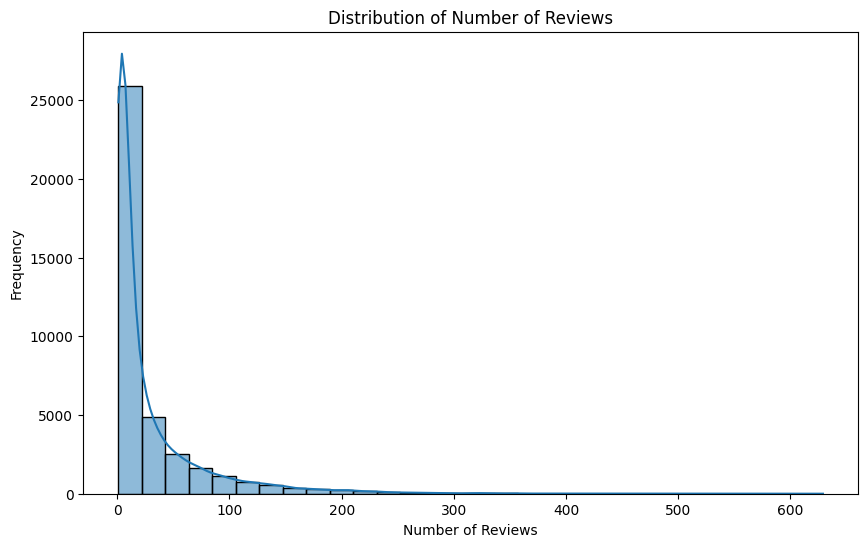

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=30, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

To see how reviews are distributed across listings.

##### 2. What is/are the insight(s) found from the chart?

A small number of listings may have a disproportionately high number of reviews.

##### 3. Will the gained insights help creating a positive business impact?



Are there any insights that lead to negative growth? Justify with specific reason.

Focused efforts on increasing reviews for less-reviewed listings could drive engagement.

#### Chart - 10 : Pairplot of Key Numerical Features

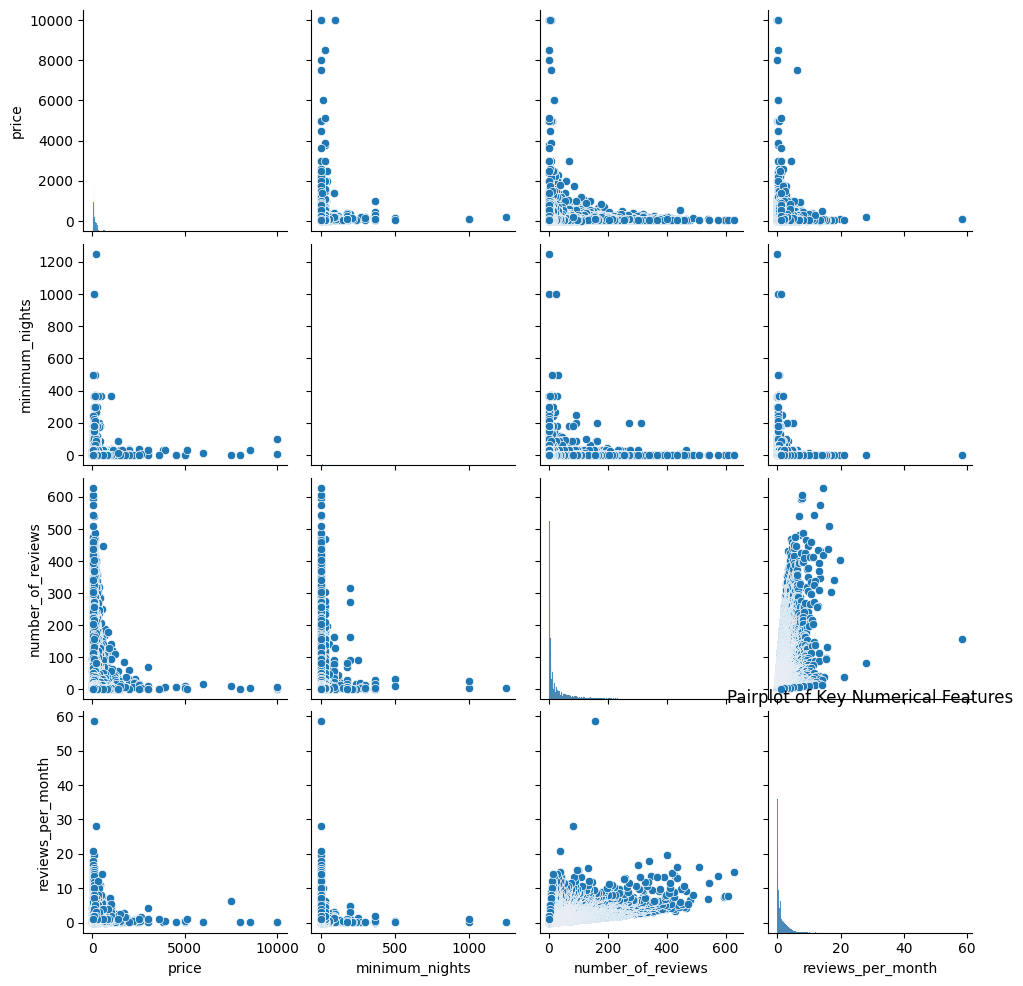

In [25]:
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']])
plt.title('Pairplot of Key Numerical Features')
plt.show()


##### 1. Why did you pick the specific chart?

To explore relationships between multiple numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Complex interactions may emerge, revealing patterns that affect pricing and occupancy.

##### 3. Will the gained insights help creating a positive business impact?



Are there any insights that lead to negative growth? Justify with specific reason.

Insights from these patterns can refine business strategies and operational focus.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?



To achieve business objectives for the Airbnb NYC 2019 dataset, the client should implement a dynamic pricing strategy to optimize rates based on demand and seasonality. Enhancing marketing efforts through targeted advertising and promoting unique listing features will attract diverse customer segments. Improving guest experiences by managing reviews and personalizing interactions can lead to higher satisfaction and repeat bookings. Engaging hosts to increase listings and availability, coupled with regular data analysis for informed decision-making, will strengthen market positioning. Additionally, leveraging technology for mobile optimization and machine learning predictions will help anticipate trends, while ensuring compliance with local regulations will foster positive community relations.

# **Conclusion**

leveraging data-driven strategies will enable the client to optimize pricing, enhance guest experiences, and increase market presence. By focusing on targeted marketing and host engagement while ensuring compliance with local regulations, the client can effectively drive growth and revenue in the competitive Airbnb landscape.